In [78]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
from numpy import random
from datetime import datetime
from math import nan
from sklearn.cluster import KMeans
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

In [3]:
matches = pd.read_csv('all_match_df.csv')

In [4]:
matches.shape

(21374, 32)

In [5]:
matches.head()

,id,league_id,date,match_api_id,home_team_goal,away_team_goal,home_overall_rating,away_overall_rating,home_crossing,away_crossing,...,home_sprint_speed,away_sprint_speed,home_agility,away_agility,home_vision,away_vision,home_standing_tackle,away_standing_tackle,home_sliding_tackle,away_sliding_tackle
0,146,1,2009,493017,2,1,61.818182,66.045455,49.863636,55.318182,...,63.454545,68.454545,60.200000,65.363636,61.200000,60.818182,48.272727,47.545455,53.100000,49.272727
1,154,1,2009,493025,1,3,66.136364,68.818182,57.181818,58.318182,...,68.181818,70.227273,65.272727,63.818182,68.181818,67.545455,49.000000,49.772727,49.818182,46.909091
2,156,1,2009,493027,2,0,70.954545,63.545455,58.818182,52.090909,...,68.909091,66.272727,63.727273,64.363636,68.636364,66.000000,58.636364,49.772727,57.090909,51.000000
3,163,1,2009,493034,2,1,62.181818,70.954545,49.409091,56.818182,...,64.136364,69.727273,59.454545,63.454545,61.727273,64.545455,47.954545,58.454545,53.454545,56.727273
4,169,1,2009,493040,0,0,64.136364,61.909091,53.727273,48.454545,...,66.681818,63.545455,65.454545,66.250000,66.181818,61.750000,50.409091,47.681818,51.818182,49.750000


In [54]:
matches['result'] = np.where(matches['home_team_goal']>matches['away_team_goal'],'win', 
                             np.where(matches['home_team_goal'] == matches['away_team_goal'],'tie','lose'))

In [8]:
new_columns = ['match_api_id', 'result','home_overall_rating','home_crossing','home_finishing','home_long_passing','home_ball_control',
                'home_volleys','home_dribbling','home_acceleration', 'home_sprint_speed','home_agility','home_vision', 
                'home_standing_tackle','home_sliding_tackle','away_overall_rating', 'away_crossing',  'away_finishing','away_long_passing', 
                'away_ball_control',  'away_volleys', 'away_dribbling', 'away_acceleration','away_sprint_speed', 'away_agility', 'away_vision', 
                'away_standing_tackle',  'away_sliding_tackle']

In [55]:
matches_new = matches.reindex(columns = new_columns)

In [56]:
matches_new.head()

,match_api_id,result,home_overall_rating,home_crossing,home_finishing,home_long_passing,home_ball_control,home_volleys,home_dribbling,home_acceleration,...,away_long_passing,away_ball_control,away_volleys,away_dribbling,away_acceleration,away_sprint_speed,away_agility,away_vision,away_standing_tackle,away_sliding_tackle
0,493017,win,61.818182,49.863636,48.090909,53.636364,57.500000,44.100000,52.090909,62.181818,...,58.909091,62.636364,53.727273,57.136364,69.181818,68.454545,65.363636,60.818182,47.545455,49.272727
1,493025,lose,66.136364,57.181818,55.954545,61.590909,63.772727,54.363636,58.909091,65.500000,...,62.500000,63.500000,54.818182,59.181818,63.954545,70.227273,63.818182,67.545455,49.772727,46.909091
2,493027,win,70.954545,58.818182,51.500000,64.409091,67.181818,50.363636,57.772727,65.409091,...,56.227273,58.090909,47.181818,49.500000,63.863636,66.272727,64.363636,66.000000,49.772727,51.000000
3,493034,win,62.181818,49.409091,49.500000,52.545455,57.227273,45.000000,51.000000,62.500000,...,62.590909,66.181818,50.090909,57.681818,68.181818,69.727273,63.454545,64.545455,58.454545,56.727273
4,493040,tie,64.136364,53.727273,44.818182,57.454545,58.500000,47.545455,51.136364,64.090909,...,54.500000,55.000000,53.750000,49.909091,61.454545,63.545455,66.250000,61.750000,47.681818,49.750000


In [11]:
matches_new.isna().sum()

match_api_id            0
result                  0
home_overall_rating     0
home_crossing           0
home_finishing          0
home_long_passing       0
home_ball_control       0
home_volleys            0
home_dribbling          0
home_acceleration       0
home_sprint_speed       0
home_agility            0
home_vision             0
home_standing_tackle    0
home_sliding_tackle     0
away_overall_rating     0
away_crossing           0
away_finishing          0
away_long_passing       0
away_ball_control       0
away_volleys            0
away_dribbling          0
away_acceleration       0
away_sprint_speed       0
away_agility            0
away_vision             0
away_standing_tackle    0
away_sliding_tackle     0
dtype: int64

In [14]:
matches_EDA = matches_new.loc[:, ['result','home_overall_rating','home_crossing','home_finishing','home_long_passing','home_ball_control',
                'home_volleys','home_dribbling','home_acceleration', 'home_sprint_speed','home_agility','home_vision', 
                'home_standing_tackle','home_sliding_tackle']]

In [15]:
matches_EDA.head()

,result,home_overall_rating,home_crossing,home_finishing,home_long_passing,home_ball_control,home_volleys,home_dribbling,home_acceleration,home_sprint_speed,home_agility,home_vision,home_standing_tackle,home_sliding_tackle
0,2,61.818182,49.863636,48.090909,53.636364,57.500000,44.100000,52.090909,62.181818,63.454545,60.200000,61.200000,48.272727,53.100000
1,0,66.136364,57.181818,55.954545,61.590909,63.772727,54.363636,58.909091,65.500000,68.181818,65.272727,68.181818,49.000000,49.818182
2,2,70.954545,58.818182,51.500000,64.409091,67.181818,50.363636,57.772727,65.409091,68.909091,63.727273,68.636364,58.636364,57.090909
3,2,62.181818,49.409091,49.500000,52.545455,57.227273,45.000000,51.000000,62.500000,64.136364,59.454545,61.727273,47.954545,53.454545
4,1,64.136364,53.727273,44.818182,57.454545,58.500000,47.545455,51.136364,64.090909,66.681818,65.454545,66.181818,50.409091,51.818182


<AxesSubplot:>

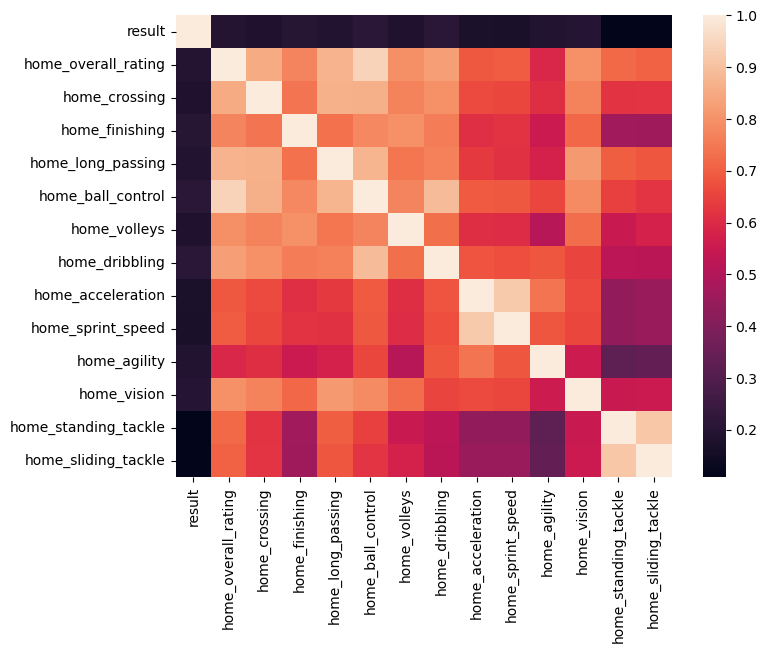

In [17]:
plt.subplots(figsize=(8,6))
sns.heatmap(matches_EDA.corr())

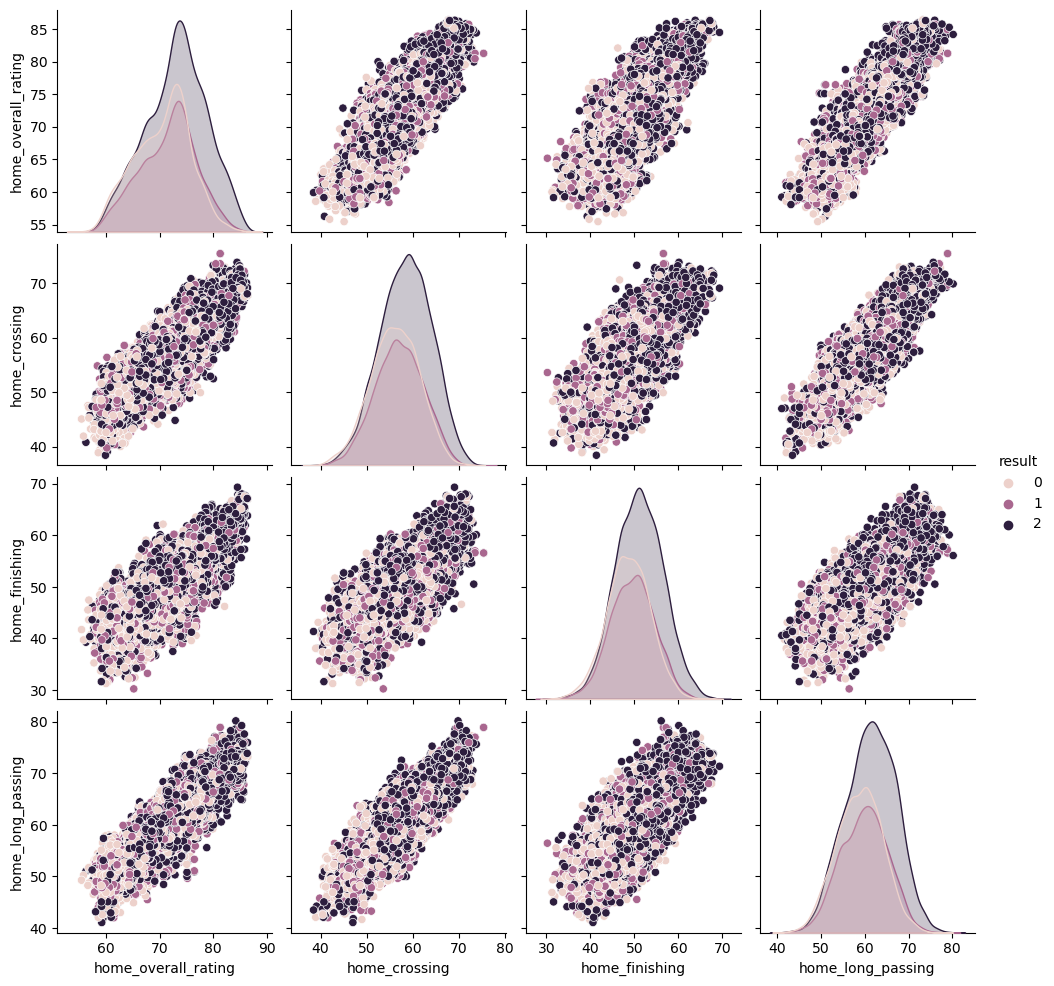

In [90]:
sns.pairplot(matches_EDA.iloc[:,:5], hue='result')

Index(['home_overall_rating', 'home_crossing', 'home_finishing',
       'home_long_passing', 'home_ball_control', 'home_volleys',
       'home_dribbling', 'home_acceleration', 'home_sprint_speed',
       'home_agility', 'home_vision', 'home_standing_tackle',
       'home_sliding_tackle', 'away_overall_rating', 'away_crossing',
       'away_finishing', 'away_long_passing', 'away_ball_control',
       'away_volleys', 'away_dribbling', 'away_acceleration',
       'away_sprint_speed', 'away_agility', 'away_vision',
       'away_standing_tackle', 'away_sliding_tackle'],
      dtype='object')

{0, 1, 2}

In [57]:
X,y = matches_new.iloc[:, 2:].values, matches_new.iloc[:,1]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 47,stratify=y)

In [59]:
X_train.shape, X_test.shape

((14961, 26), (6413, 26))

In [68]:
model=LogisticRegression(max_iter = 500,)

In [69]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [70]:
y_pred = model.predict(X_test)

In [76]:
confusion_matrix(y_test,y_pred)

array([[ 940,   12,  898],
       [ 492,    2, 1126],
       [ 486,    7, 2450]], dtype=int64)

C:\Users\lorih\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


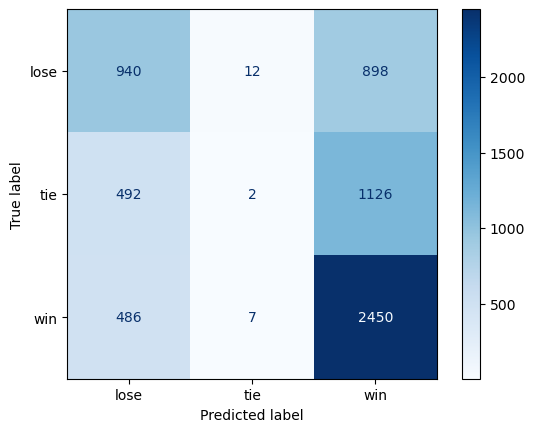

In [84]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [72]:
accuracy_score(y_test, y_pred)

0.5289256198347108

In [75]:
r2_score = model.score(X_test, y_test)
print("R^2 score: {:.2f}".format(r2_score))

R^2 score: 0.53
